# Country Analysis
    1. Explanitory variables
        1. Population 
        https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population
        1. Internet Prevelance (make sure to divide by population)
        https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users
        1. Net Migration Rate
        https://en.wikipedia.org/wiki/List_of_countries_by_net_migration_rate
        1. Pop in poverty
        https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty
        1. Employment Rate
        https://en.wikipedia.org/wiki/List_of_sovereign_states_by_employment_rate
        1. Literacy rate
        https://en.wikipedia.org/wiki/List_of_countries_by_literacy_rate
        
    1. Some less regular variables
        1. Wine production https://en.wikipedia.org/wiki/List_of_wine-producing_regions#Countries
    
    1. Target variable
        1. Unemployment https://en.wikipedia.org/wiki/List_of_sovereign_states_by_unemployment_rate
        
    1. Plot unemployment vs homelesness
    https://en.wikipedia.org/wiki/List_of_sovereign_states_by_homeless_population
    
    1. How is unemployment measured??
    https://ilostat.ilo.org/resources/concepts-and-definitions/description-work-statistics-icls19/
    
    1. How is unemployment calculated?
    https://ilostat.ilo.org/resources/concepts-and-definitions/description-work-statistics-icls19/#elementor-toc__heading-anchor-4

# Import libraries

In [128]:
import pandas as pd 
from matplotlib import pyplot as plt
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#tableIndex-number of the table in wiki
def get_table(url,tableIndex):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    # find all table elements on the page with class name "wikitable"
    tables = soup.find_all("table", {"class": "wikitable"})
    second_table = tables[tableIndex]
    # read the table data into a pandas dataframe
    df = pd.read_html(str(second_table))[0]

    return df



# Population

In [4]:
df_population=get_table('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population',0)

In [5]:
df_population

Rank                 Country / Dependency  Population                 \
    Rank                 Country / Dependency     Numbers % of the world   
0      –                                World  8026638000           100%   
1      1                                China  1411750000            NaN   
2      2                                India  1392329000            NaN   
3      3                        United States   334640000            NaN   
4      4                            Indonesia   275773800            NaN   
..   ...                                  ...         ...            ...   
237    –                Tokelau (New Zealand)        1647            NaN   
238    –                                 Niue        1549            NaN   
239  195                         Vatican City         825            NaN   
240    –  Cocos (Keeling) Islands (Australia)         593            NaN   
241    –    Pitcairn Islands (United Kingdom)          47            NaN   

            Date Source (official or from the United Nations)      Notes  
            Date Source (official or from the United Nations)      Notes  
0    18 Apr 2023                             UN projection[3]        NaN  
1    31 Dec 2022                         Official estimate[4]        [b]  
2     1 Mar 2023                       Official projection[5]  [c] [[1]]  
3    18 Apr 2023                 National population clock[6]        [d]  
4     1 Jul 2022                         Official estimate[7]        NaN  
..           ...                                          ...        ...  
237   1 Jan 2019                            2019 Census [205]        NaN  
238   1 Jul 2021               National annual projection[94]        NaN  
239   1 Feb 2019               Monthly national estimate[206]       [ag]  
240  30 Jun 2020                             2021 Census[207]        NaN  
241   1 Jul 2021                       Official estimate[208]        NaN  

[242 rows x 7 columns]

In [6]:
df_population.columns= df_population.columns.map('_'.join)

In [7]:
df_population.columns

Index(['Rank_Rank', 'Country / Dependency_Country / Dependency',
       'Population_Numbers', 'Population_% of the world', 'Date_Date',
       'Source (official or from the United Nations)_Source (official or from the United Nations)',
       'Notes_Notes'],
      dtype='object')

In [8]:
df_population=df_population[['Country / Dependency_Country / Dependency',
       'Population_Numbers']]

In [9]:
df_population.columns=['Country','Population']

In [10]:
df_population.head()

,Country,Population
0,World,8026638000
1,China,1411750000
2,India,1392329000
3,United States,334640000
4,Indonesia,275773800


# Unemployeement

In [11]:
df_unemployeement=pd.read_csv('/data/UnemployeementRate.csv')
df_unemployeement

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.512784,6.555645,6.707142,6.855589,6.940365,6.913046,7.121664,7.631303,7.920219,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.804448,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.834000,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.264000,13.470000,13.783000,13.407000,13.250000,13.076000,12.978000,13.575000,13.887000,NaN
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.040001,22.610001,22.870001,24.020000,23.990000,24.219999,25.540001,24.340000,28.770000,NaN
264,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.005000,8.133000,8.280000,8.393000,8.520000,5.030000,5.540000,6.030000,6.220000,NaN


In [12]:
df_unemployeement=df_unemployeement[['Country Name','2021']]

In [13]:
df_final=pd.merge(df_unemployeement, df_population, left_on='Country Name', right_on='Country', how='inner')

In [14]:
df_final

,Country Name,2021,Country,Population
0,Afghanistan,NaN,Afghanistan,32890171
1,Angola,10.384,Angola,33086278
2,Albania,12.683,Albania,2793592
3,Andorra,NaN,Andorra,81057
4,United Arab Emirates,3.110,United Arab Emirates,9282410
...,...,...,...,...
164,Samoa,9.910,Samoa,199853
165,Kosovo,NaN,Kosovo,1798188
166,South Africa,28.770,South Africa,60604992
167,Zambia,6.220,Zambia,19610769


# Internet users

In [15]:
# example usage: extract the second table from "List of countries by number of Internet users" page
df_internetUsers = get_table("https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users",2)

In [16]:
df_internetUsers=df_internetUsers[['Country or area', 'Internet users']]

In [17]:
df_internetUsers.head()

,Country or area,Internet users
0,China,1051140000
1,India,836860000
2,United States,307200000
3,Indonesia,196000000
4,Brazil,165300000


# internetUsers vs Unemployment

In [18]:
# df_internetUsers=pd.merge(df_internetUsers, df_population, left_on='Country or area', right_on='Country', how='inner')

In [19]:
# df_internetUsers['%of internetusers']=df_internetUsers['Internet users']/df_internetUsers['Population']

In [20]:
df_final=pd.merge(df_internetUsers, df_final, left_on='Country or area', right_on='Country Name', how='inner')

In [21]:
df_final

,Country or area,Internet users,Country Name,2021,Country,Population
0,China,1051140000,China,4.550,China,1411750000
1,India,836860000,India,7.713,India,1392329000
2,United States,307200000,United States,5.350,United States,334640000
3,Indonesia,196000000,Indonesia,3.830,Indonesia,275773800
4,Brazil,165300000,Brazil,13.340,Brazil,216032823
...,...,...,...,...,...,...
161,Marshall Islands,20560,Marshall Islands,NaN,Marshall Islands,39262
162,San Marino,20100,San Marino,NaN,San Marino,33785
163,Kiribati,16971,Kiribati,NaN,Kiribati,120740
164,Nauru,6475,Nauru,NaN,Nauru,11832


# Migration

In [22]:
df_migration=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_net_migration_rate',3)

In [23]:
df_migration

,Country,"Migrants per 1,000 population"
0,South Sudan,21.1
1,British Virgin Islands,13.6
2,Luxembourg,12.0
3,Cayman Islands (UK),12.6
4,Qatar,2.5
...,...,...
215,Puerto Rico (US),−11.9
216,Tonga,−18.0
217,Lebanon,−0.1
218,"Micronesia, Federated States of",−20.9


In [24]:
df_final=pd.merge(df_migration, df_final, left_on='Country', right_on='Country Name', how='inner')


# Poverty

In [25]:
df_poverty=get_table('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty',0)

In [26]:
df_poverty.columns

Index(['Country', '< $1.90[1][5]', '< $3.20[6]', '< $5.50[7]', 'Year',
       'Continent', 'Unnamed: 6'],
      dtype='object')

In [27]:
df_poverty=df_poverty[['Country', '< $1.90[1][5]']]

In [28]:
df_final=pd.merge(df_poverty, df_final, left_on='Country', right_on='Country Name', how='inner')


In [29]:
df_final

,Country,< $1.90[1][5],Country_x,"Migrants per 1,000 population",Country or area,Internet users,Country Name,2021,Country_y,Population
0,Albania,10.00%,Albania,−3.2,Albania,2105339,Albania,12.683,Albania,2793592
1,Algeria,0.32%,Algeria,−0.8,Algeria,32090000,Algeria,11.747,Algeria,45400000
2,Angola,51.40%,Angola,-0.2,Angola,4271053,Angola,10.384,Angola,33086278
3,Argentina,1.60%,Argentina,−0.1,Argentina,33561876,Argentina,8.740,Argentina,46044703
4,Armenia,0.40%,Armenia,−5.4,Armenia,2043110,Armenia,12.729,Armenia,2976800
...,...,...,...,...,...,...,...,...,...,...
135,Uzbekistan,10.68%,Uzbekistan,−1.8,Uzbekistan,16692456,Uzbekistan,6.017,Uzbekistan,36169199
136,Vanuatu,8.60%,Vanuatu,−1.3,Vanuatu,71050,Vanuatu,2.118,Vanuatu,301295
137,Vietnam,1.35%,Vietnam,−0.2,Vietnam,68172134,Vietnam,2.380,Vietnam,99460000
138,Zambia,58.52%,Zambia,0.2,Zambia,4760715,Zambia,6.220,Zambia,19610769


# Below PovertyLine

In [30]:
#Percent of population living below national poverty line
df_belowPovertyLine=get_table('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty',1)

In [31]:
df_belowPovertyLine

,Country,World Bank[9],Year,CIA[10],Year.1,Other,Year.2,Continent
0,Afghanistan,54.5%,2016,54.5%,2017,—,—,Asia
1,Albania,21.8%,2019,14.3%,2012,—,—,Europe
2,Algeria,5.5%,2011,5.5%,2011,—,—,Africa
3,Angola,32.3%,2018,32.3%,2018,—,—,Africa
4,Anguilla,—,—,23.0%,2002,—,—,North America
...,...,...,...,...,...,...,...,...
179,Vietnam,6.7%,2018,6.7%,2018,—,—,Asia
180,"Virgin Islands, U.S.",—,—,28.9%,2002,—,—,North America
181,Yemen,48.6%,2014,48.6%,2014,—,—,Asia
182,Zambia,54.4%,2015,54.4%,2015,—,—,Africa


In [32]:
df_belowPovertyLine=df_belowPovertyLine[['Country','World Bank[9]']]

In [33]:
df_final=pd.merge(df_belowPovertyLine, df_final, left_on='Country', right_on='Country Name', how='inner')

<ipython-input-33-7a05ee0916fa>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Country_y'} in the result is deprecated and will raise a MergeError in a future version.
  df_final=pd.merge(df_belowPovertyLine, df_final, left_on='Country', right_on='Country Name', how='inner')


# literacyRate

In [34]:
df_literacyRate=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_literacy_rate',0)

In [35]:
df_literacyRate

Country Youth (15 to 24)         Adult (25+)          \
               Country             Rate    Year        Rate    Year   
0        Afghanistan *             47.0  2011.0        31.7  2011.0   
1            Albania *             99.2  2012.0        97.2  2012.0   
2            Algeria *             93.8  2008.0        75.1  2008.0   
3     American Samoa *             97.7  1980.0        97.3  1980.0   
4            Andorra *              NaN     NaN         NaN     NaN   
..                 ...              ...     ...         ...     ...   
229  Wallis and Futuna              NaN     NaN         NaN     NaN   
230     Western Sahara              NaN     NaN         NaN     NaN   
231            Yemen *             77.0  2004.0        54.1  2004.0   
232           Zambia *             88.7  2010.0        83.0  2010.0   
233         Zimbabwe *             90.4  2014.0        88.7  2014.0   

    Elderly (65+)         Youth Gender Parity Index          
             Rate    Year                      Rate    Year  
0            20.3  2011.0                       0.5  2011.0  
1            86.9  2012.0                       1.0  2012.0  
2            19.5  2008.0                       1.0  2008.0  
3            92.7  1980.0                       1.0  1980.0  
4             NaN     NaN                       NaN     NaN  
..            ...     ...                       ...     ...  
229           NaN     NaN                       NaN     NaN  
230           NaN     NaN                       NaN     NaN  
231          13.7  2004.0                       0.7  2004.0  
232          52.3  2010.0                       0.9  2010.0  
233          81.1  2014.0                       1.1  2014.0  

[234 rows x 9 columns]

In [36]:
df_literacyRate.columns= df_literacyRate.columns.map('_'.join)

In [37]:
df_literacyRate

,Country_Country,Youth (15 to 24)_Rate,Youth (15 to 24)_Year,Adult (25+)_Rate,Adult (25+)_Year,Elderly (65+)_Rate,Elderly (65+)_Year,Youth Gender Parity Index_Rate,Youth Gender Parity Index_Year
0,Afghanistan *,47.0,2011.0,31.7,2011.0,20.3,2011.0,0.5,2011.0
1,Albania *,99.2,2012.0,97.2,2012.0,86.9,2012.0,1.0,2012.0
2,Algeria *,93.8,2008.0,75.1,2008.0,19.5,2008.0,1.0,2008.0
3,American Samoa *,97.7,1980.0,97.3,1980.0,92.7,1980.0,1.0,1980.0
4,Andorra *,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,Yemen *,77.0,2004.0,54.1,2004.0,13.7,2004.0,0.7,2004.0
232,Zambia *,88.7,2010.0,83.0,2010.0,52.3,2010.0,0.9,2010.0


In [38]:
df_literacyRate[['Country_Country','waste']]=df_literacyRate.Country_Country.str.split('*',expand=True)

In [39]:
df_literacyRate.Country_Country=df_literacyRate.Country_Country.str.strip()

In [40]:
df_literacyRate.columns

Index(['Country_Country', 'Youth (15 to 24)_Rate', 'Youth (15 to 24)_Year',
       'Adult (25+)_Rate', 'Adult (25+)_Year', 'Elderly (65+)_Rate',
       'Elderly (65+)_Year', 'Youth Gender Parity Index_Rate',
       'Youth Gender Parity Index_Year', 'waste'],
      dtype='object')

In [41]:
df_literacyRate=df_literacyRate[['Country_Country','Youth (15 to 24)_Rate','Adult (25+)_Rate','Elderly (65+)_Rate']]

In [42]:
df_final=pd.merge(df_literacyRate, df_final, left_on='Country_Country', right_on='Country Name', how='inner')



# GDP

In [43]:
df_GDP=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita',0)

In [44]:
df_GDP['Country/Territory']['Country/Territory']

0                NaN
1             Monaco
2      Liechtenstein
3         Luxembourg
4            Ireland
           ...      
219           Malawi
220      South Sudan
221     Sierra Leone
222      Afghanistan
223          Burundi
Name: Country/Territory, Length: 224, dtype: object

In [45]:
df_GDP.columns= df_GDP.columns.map('_'.join)

In [46]:
df_GDP

,Country/Territory_Country/Territory,UN Region_UN Region,IMF[4][5]_Estimate,IMF[4][5]_Year,World Bank[6]_Estimate,World Bank[6]_Year,United Nations[7]_Estimate,United Nations[7]_Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monaco,Europe,—,—,234316,2021,234317,2021
2,Liechtenstein,Europe,—,—,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496,2023,635,2021,613,2021
220,South Sudan,Africa,467,2023,1072,2015,400,2021
221,Sierra Leone,Africa,415,2023,480,2021,505,2021
222,Afghanistan,Asia,611,2020,369,2021,373,2021


In [47]:
df_GDP=df_GDP[['Country/Territory_Country/Territory','World Bank[6]_Estimate']]

In [48]:
df_GDP

,Country/Territory_Country/Territory,World Bank[6]_Estimate
0,NaN,NaN
1,Monaco,234316
2,Liechtenstein,157755
3,Luxembourg,133590
4,Ireland,100172
...,...,...
219,Malawi,635
220,South Sudan,1072
221,Sierra Leone,480
222,Afghanistan,369


In [49]:
df_final=pd.merge(df_GDP,df_final,left_on='Country/Territory_Country/Territory',right_on='Country Name',how='left')

# Interest rates

In [50]:
df_inrerestRate=get_table('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_central_bank_interest_rates',0)

In [51]:
df_inrerestRate

,Country or currency union,Central bank interest rate (%),Effective date of last change,Average inflation rate 2017–2021 (%) by WB and IMF[1][2] as in the List,Central bank interest rate minus average inflation rate (2017–2021)
0,Albania,3.00,23 March 2023[3],1.78,1.22
1,Algeria,3.00,29 April 2020[4],4.14,-1.14
2,Angola,17.00,21 March 2023[5],22.64,-5.64
3,Argentina,78.00,17 March 2023[6],40.85,37.15
4,Armenia,10.75,13 December 2022[7],2.62,8.13
...,...,...,...,...,...
99,Uzbekistan,15.00,22 July 2022[100],13.95,1.05
100,Vietnam,3.50,15 March 2023[101],3.02,0.48
101,West African States,2.75,16 December 2022[102],NaN,NaN
102,Zambia,9.25,15 February 2023[103],12.25,-3.00


In [52]:
df_inrerestRate=df_inrerestRate[['Country or currency union','Central bank interest rate (%)']]

In [53]:
df_final=pd.merge(df_inrerestRate,df_final,left_on='Country or currency union',right_on='Country Name',how='left')

In [54]:
df_final.columns

Index(['Country or currency union', 'Central bank interest rate (%)',
       'Country/Territory_Country/Territory', 'World Bank[6]_Estimate',
       'Country_Country', 'Youth (15 to 24)_Rate', 'Adult (25+)_Rate',
       'Elderly (65+)_Rate', 'Country_x', 'World Bank[9]', 'Country_y',
       '< $1.90[1][5]', 'Country_x', 'Migrants per 1,000 population',
       'Country or area', 'Internet users', 'Country Name', '2021',
       'Country_y', 'Population'],
      dtype='object')

In [55]:
df_final=df_final[['Country Name','Central bank interest rate (%)',
 'World Bank[6]_Estimate', 'Youth (15 to 24)_Rate', 'Adult (25+)_Rate',
       'Elderly (65+)_Rate', 'World Bank[9]',
       '< $1.90[1][5]', 'Migrants per 1,000 population', 'Internet users','Population', '2021']]

In [56]:
# df_final=df_final.drop(labels=101)

In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    76 non-null     object 
 1   Central bank interest rate (%)  104 non-null    float64
 2   World Bank[6]_Estimate          76 non-null     object 
 3   Youth (15 to 24)_Rate           67 non-null     object 
 4   Adult (25+)_Rate                67 non-null     object 
 5   Elderly (65+)_Rate              67 non-null     object 
 6   World Bank[9]                   76 non-null     object 
 7   < $1.90[1][5]                   76 non-null     object 
 8   Migrants per 1,000 population   76 non-null     object 
 9   Internet users                  76 non-null     float64
 10  Population                      76 non-null     float64
 11  2021                            75 non-null     float64
dtypes: float64(4), object(8)
memory usag

In [58]:
df_final['World Bank[6]_Estimate']=df_final['World Bank[6]_Estimate'].astype(float)

In [59]:
df_final['Youth (15 to 24)_Rate']=df_final['Youth (15 to 24)_Rate'].replace({'99.8[4]':'99.8','97.7[7]':'97.7'})

In [60]:
df_final['Youth (15 to 24)_Rate']=df_final['Youth (15 to 24)_Rate'].astype(float)

In [61]:
df_final['Adult (25+)_Rate']=df_final['Adult (25+)_Rate'].replace({'96.8[5]':'96.8','73.8[7]':'73.8'})

In [62]:
df_final['Adult (25+)_Rate'].unique()

array(['97.2', '75.1', '66.0', '99.1', '99.7', nan, '99.8', '74.7',
       '99.6', '92.5', '87.7', '92.0', '98.4', '96.9', '96.8', '94.7',
       '97.4', '93.8', '83.1', '71.5', '81.3', '89.0', '75.4', '95.4',
       '91.8', '88.1', '97.9', '78.7', '62.1', '89.5', '93.2', '94.9',
       '98.3', '73.8', '56.0', '88.3', '78.0', '51.1', '96.1', '59.1',
       '61.6', '94.1', '96.4', '98.7', '98.6', '70.8', '99.0', '98.8',
       '94.0', '32.4', '94.4', '91.9', '92.9', '79.0', '70.2', '100.0',
       '95.8', '83.0', '88.7'], dtype=object)

In [63]:
df_final['Adult (25+)_Rate']=df_final['Adult (25+)_Rate'].astype(float)

In [64]:

df_final['Elderly (65+)_Rate'].unique()

array(['86.9', '19.5', '27.0', '97.9', '98.9', nan, '98.4', '39.4',
       '98.6', '67.5', '40.7', '74.3', '97.5', '89.9', '73.9', '81.4',
       '90.4', '79.8', '45.2', '99.1', '34.9', '50.7', '66.3', '45.4',
       '70.1', '66.6', '87.7', '99.5', '54.0', '35.1', '47.1', '64.6',
       '78.9', '95.8', '94.6', '34.1[7]', '26.0', '56.7', '49.2', '21.6',
       '82.5', '27.1', '33.0', '77.8', '77.7', '90.1', '93.0', '96.8',
       '24.3', '96.3', '96.6', '71.5', '3.7', '72.1', '81.0', '98.1',
       '78.7', '82.8', '39.8', '36.1', '100.0', '97.1', '99.8', '76.9',
       '52.3', '81.1'], dtype=object)

In [65]:
df_final['Elderly (65+)_Rate']=df_final['Elderly (65+)_Rate'].replace({'34.1[7]':'34.1'})

In [66]:
df_final['Elderly (65+)_Rate']=df_final['Elderly (65+)_Rate'].astype(float)

In [67]:
df_final['World Bank[9]']=df_final['World Bank[9]'].str.replace('%', '')

In [68]:
df_final['World Bank[9]']=df_final['World Bank[9]'].str.replace('—', '-')

In [69]:
df_final['World Bank[9]']=df_final['World Bank[9]'].str.replace('-', '0')

In [70]:
df_final['World Bank[9]'].unique()

array(['21.8', '5.5', '32.3', '42.0', '27.0', nan, '6.0', '24.3', '4.8',
       '39.0', '19.3', '0', '23.8', '10.8', '10.0', '42.5', '30.0',
       '12.1', '21.0', '58.9', '29.9', '21.3', '23.4', '59.3', '48.0',
       '12.3', '8.8', '11.9', '9.8', '19.9', '15.7', '5.3', '36.1',
       '50.7', '8.4', '10.3', '43.9', '26.8', '27.8', '46.1', '17.4',
       '24.9', '40.1', '21.6', '21.9', '39.9', '26.9', '30.1', '16.7',
       '14.8', '38.2', '20.3', '21.7', '25.3', '56.8', '55.5', '4.1',
       '16.1', '15.5', '26.3', '6.8', '15.2', '1.1', '18.6', '11.6',
       '14.1', '6.7', '54.4', '38.3'], dtype=object)

In [71]:
df_final['World Bank[9]']=df_final['World Bank[9]'].astype(float)

In [72]:
df_final['Migrants per 1,000 population']=df_final['Migrants per 1,000 population'].str.replace('−', '-')

In [73]:
df_final['Migrants per 1,000 population'].unique()

array(['-3.2', '-0.8', '-0.2', '-0.1', '-5.4', nan, '0.0', '-2.9', '0.7',
       '2.8', '-0.3', '5.5', '0.3', '-1.6', '0.8', '2.7', '-2.7', '-6.2',
       '-5.9', '-1.7', '-1.3', '1.2', '2.9', '0.2', '2.0', '-7.7',
       '-11.1', '0.4', '1.5', '-0.7', '-8.8', '-2.2', '-0.4', '-1.0',
       '-4.4', '-7.5', '-2.0', '-1.2', '3.6', '4.5', '-3.3', '3.0',
       '-0.9', '-1.8', '-4.8'], dtype=object)

In [74]:
df_final['Migrants per 1,000 population']=df_final['Migrants per 1,000 population'].astype(float)

In [75]:
df_final['< $1.90[1][5]']=df_final['< $1.90[1][5]'].str.replace('%', '')

In [76]:
df_final['< $1.90[1][5]']=df_final['< $1.90[1][5]'].astype(float)

In [77]:
df_final=df_final.rename(columns={'< $1.90[1][5]':'Poverty(< $1.90)','World Bank[9]':'belowPovertyLine','World Bank[6]_Estimate':'GDP',
                                  'Youth (15 to 24)_Rate':'Literacy_rate_Youth','Adult (25+)_Rate':'Literacy_rate_Adult',
                                 'Elderly (65+)_Rate':'Literacy_rate_Elder','2021':'Unemploymentrate_2021'})

In [78]:
df_final=df_final[['Country Name', 'Central bank interest rate (%)', 'GDP',
       'Literacy_rate_Youth', 'Literacy_rate_Adult', 'Literacy_rate_Elder',
       'belowPovertyLine', 'Poverty(< $1.90)', 'Migrants per 1,000 population',
       'Internet users', 'Population','Unemploymentrate_2021']]

# Scatterplots for each of features vs Unemployment

<Axes: xlabel='Central bank interest rate (%)', ylabel='Unemploymentrate_2021'>

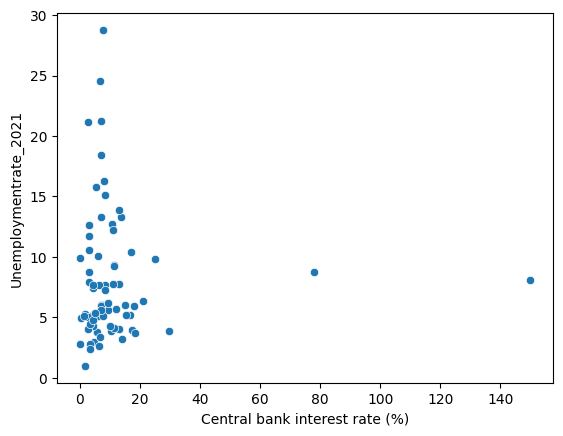

In [79]:
sns.scatterplot(x='Central bank interest rate (%)',y='Unemploymentrate_2021',data=df_final)

<Axes: xlabel='GDP', ylabel='Unemploymentrate_2021'>

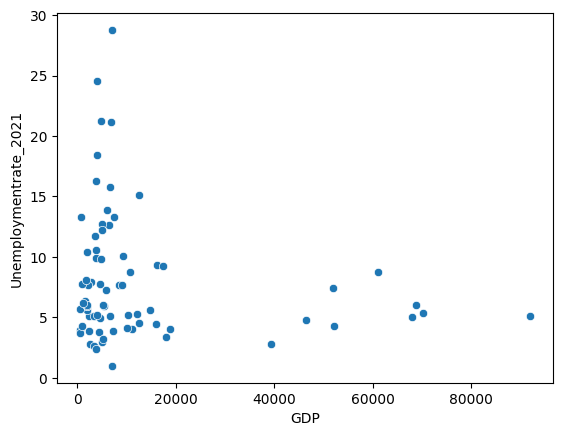

In [80]:
sns.scatterplot(x='GDP',y='Unemploymentrate_2021',data=df_final)

<Axes: xlabel='Literacy_rate_Adult', ylabel='Unemploymentrate_2021'>

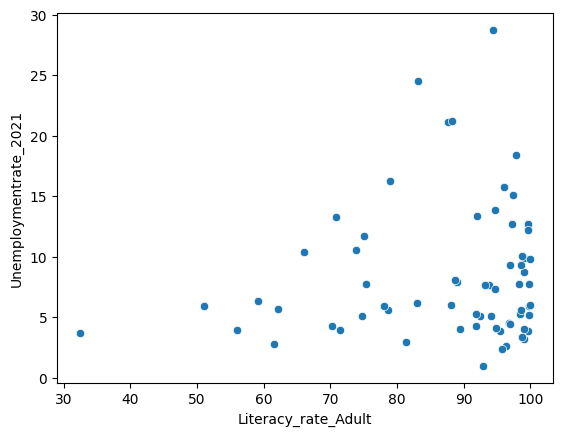

In [81]:
sns.scatterplot(x='Literacy_rate_Adult',y='Unemploymentrate_2021',data=df_final)

<Axes: xlabel='belowPovertyLine', ylabel='Unemploymentrate_2021'>

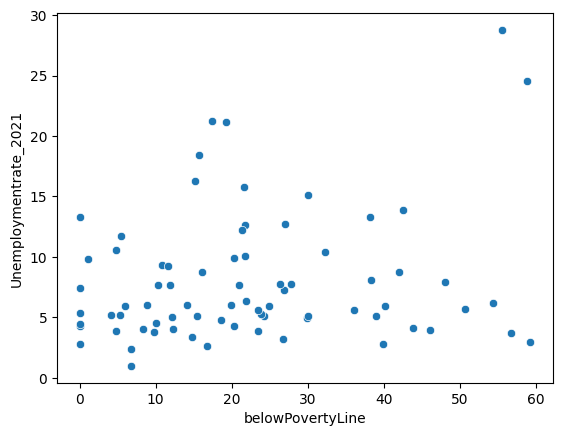

In [82]:
sns.scatterplot(x='belowPovertyLine',y='Unemploymentrate_2021',data=df_final)

<Axes: xlabel='Migrants per 1,000 population', ylabel='Unemploymentrate_2021'>

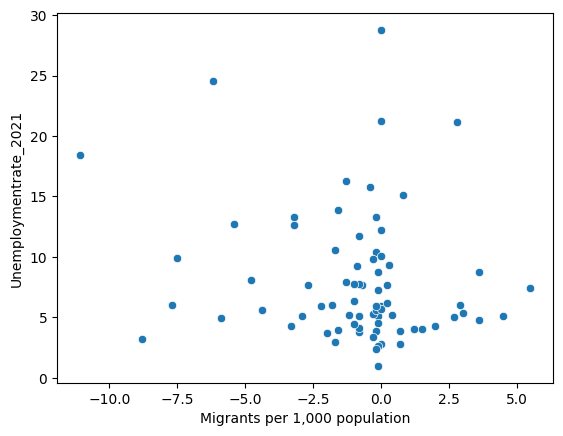

In [83]:

sns.scatterplot(x='Migrants per 1,000 population',y='Unemploymentrate_2021',data=df_final)

<Axes: xlabel='Population', ylabel='Unemploymentrate_2021'>

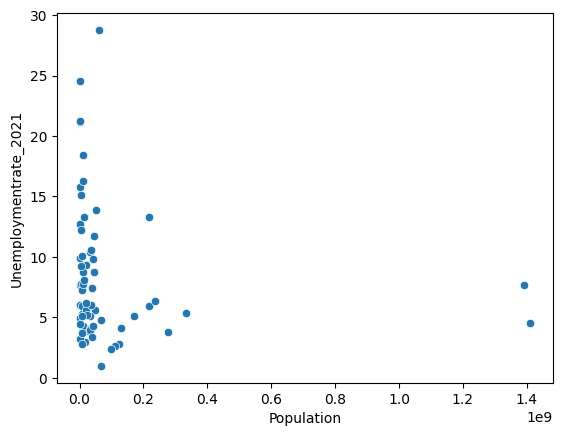

In [84]:
sns.scatterplot(x='Population',y='Unemploymentrate_2021',data=df_final)

In [85]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Get the list of column names in the DataFrame
# column_names = df_final.columns.tolist()

# # Remove the target variable from the list of column names
# column_names.remove('Unemploymentrate_2021')

# # Create a figure with subplots for each column
# fig, axes = plt.subplots(nrows=len(column_names), ncols=1, figsize=(10, 30))

# # Loop through each column and plot against the target variable
# for i, col in enumerate(column_names):
#     sns.scatterplot(x=col, y='Unemploymentrate_2021', data=df_final, ax=axes[i])
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Unemploymentrate_2021')

# # Adjust the layout of the subplots
# plt.tight_layout()
# plt.show()



In [86]:
corr=df_final.corr()

<ipython-input-86-0841f7c21fdc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_final.corr()


<Axes: >

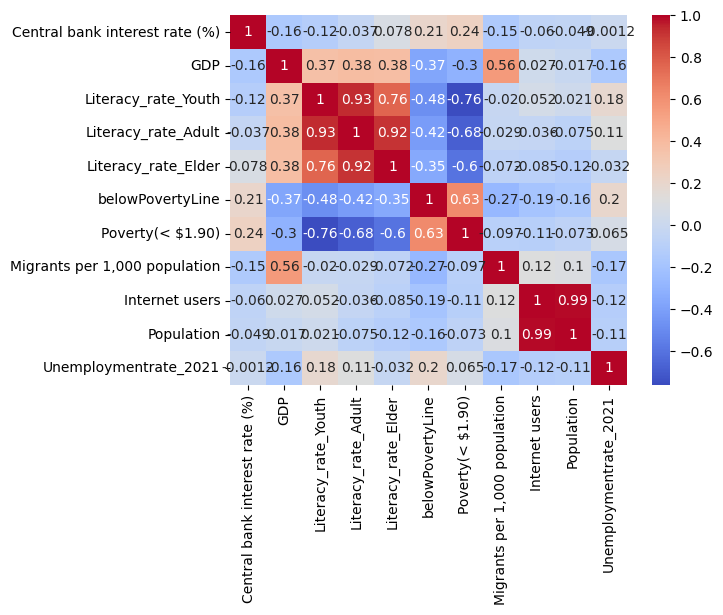

In [87]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [88]:
col_means = df_final.mean()
df_final=df_final.fillna(col_means)

<ipython-input-88-49da03d8b5f3>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  col_means = df_final.mean()


In [89]:
df_final

,Country Name,Central bank interest rate (%),GDP,Literacy_rate_Youth,Literacy_rate_Adult,Literacy_rate_Elder,belowPovertyLine,Poverty(< $1.90),"Migrants per 1,000 population",Internet users,Population,Unemploymentrate_2021
0,Albania,3.00,6493.000000,99.200000,97.200000,86.900000,21.800000,10.000000,-3.200000,2.105339e+06,2.793592e+06,12.683000
1,Algeria,3.00,3691.000000,93.800000,75.100000,19.500000,5.500000,0.320000,-0.800000,3.209000e+07,4.540000e+07,11.747000
2,Angola,17.00,1954.000000,77.400000,66.000000,27.000000,32.300000,51.400000,-0.200000,4.271053e+06,3.308628e+07,10.384000
3,Argentina,78.00,10636.000000,99.500000,99.100000,97.900000,42.000000,1.600000,-0.100000,3.356188e+07,4.604470e+07,8.740000
4,Armenia,10.75,4967.000000,99.800000,99.700000,98.900000,27.000000,0.400000,-5.400000,2.043110e+06,2.976800e+06,12.729000
...,...,...,...,...,...,...,...,...,...,...,...,...
99,Uzbekistan,15.00,1983.000000,100.000000,100.000000,99.800000,14.100000,10.680000,-1.800000,1.669246e+07,3.616920e+07,6.017000
100,Vietnam,3.50,3757.000000,97.100000,95.800000,76.900000,6.700000,1.350000,-0.200000,6.817213e+07,9.946000e+07,2.380000
101,NaN,2.75,12667.921053,94.119403,87.789552,69.108955,22.318421,9.585658,-0.892105,5.227655e+07,7.738136e+07,7.990173
102,Zambia,9.25,1137.000000,88.700000,83.000000,52.300000,54.400000,58.520000,0.200000,4.760715e+06,1.961077e+07,6.220000


In [90]:
X=df_final.drop(columns=['Country Name','Unemploymentrate_2021'])

y=df_final['Unemploymentrate_2021']

# RandomForest Regression

In [91]:
# Create and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
print(rf.score(X,y))

0.8491438289157307


In [92]:
# Create a Random Forest Regressor with 100 trees
rf = RandomForestRegressor(n_estimators=300, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())
print("Standard deviation:", scores.std())

R2 scores: [ 0.28759555  0.06829748  0.19199605 -0.01823022 -0.35524746]
Mean R2 score: 0.03488228021854269
Standard deviation: 0.22121819856825764


chaged the n_estimator values here manually nad got better results for 300.

# Linear Regression

In [93]:
lm = LinearRegression()
lm.fit(X,y)
print(lm.score(X,y))

0.2544962118861588


In [94]:
# Perform 5-fold cross-validation
scores = cross_val_score(lm, X, y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())
print("Standard deviation:", scores.std())

R2 scores: [ 0.01986732  0.22176022  0.01149951 -0.15947314 -1.03424196]
Mean R2 score: -0.1881176124987612
Standard deviation: 0.43996624488520614


# DecisionTree regression

In [95]:
# Create a Decision Tree Regressor with a maximum depth of 5
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X, y)
print(dt.score(X,y))

0.8238569955094329


In [96]:
# Perform 5-fold cross-validation
scores = cross_val_score(dt, X, y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())
print("Standard deviation:", scores.std())

R2 scores: [-0.36760693 -0.01804111 -1.65520313 -1.08057054 -0.61914219]
Mean R2 score: -0.7481127786586346
Standard deviation: 0.5705723141452874


# Trends in Unemployment

In [176]:
Unemployment_years=pd.read_csv('/data/Unemloyment_years.csv')

In [177]:
Unemployment_years=Unemployment_years[['Country Name',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021']]


In [178]:
Unemployment_years.head()

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,7.333336,7.318747,7.242706,7.160694,7.063796,7.055998,7.090541,7.060097,7.015272,...,6.599356,6.512784,6.555645,6.707142,6.855589,6.940365,6.913046,7.121664,7.631303,7.920219
1,Afghanistan,8.121000,8.168000,8.123000,8.111000,8.260000,8.165000,8.089000,8.082000,8.070000,...,8.019000,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN
2,Africa Western and Central,4.224595,4.335460,4.372125,4.366898,4.348996,4.379537,4.421117,4.454917,4.637773,...,4.167556,3.804448,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635
3,Angola,4.489000,4.487000,4.531000,4.395000,4.304000,4.274000,4.262000,4.234000,4.206000,...,8.064000,8.834000,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000
4,Albania,10.307000,30.014999,25.257999,20.840000,14.611000,13.931000,16.875999,20.047001,20.840000,...,13.380000,15.870000,18.049999,17.190001,15.420000,13.620000,12.300000,11.470000,13.067000,12.683000


In [179]:
column_mean=Unemployment_years.mean()

<ipython-input-179-90bf52e5e89a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_mean=Unemployment_years.mean()


In [180]:
Unemployment_years=Unemployment_years.fillna(column_mean)

In [181]:
melted_df = pd.melt(Unemployment_years, id_vars=["Country Name"], var_name="Year", value_name="Unemployment Rate")


In [182]:
list_of_top10_population=df_population.iloc[1:11]['Country'].tolist()

In [183]:
list_of_top10_population

['China',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Nigeria',
 'Brazil',
 'Bangladesh',
 'Russia',
 'Mexico']

In [184]:

melted_df_top=melted_df[melted_df['Country Name'].isin(list_of_top10_population)]

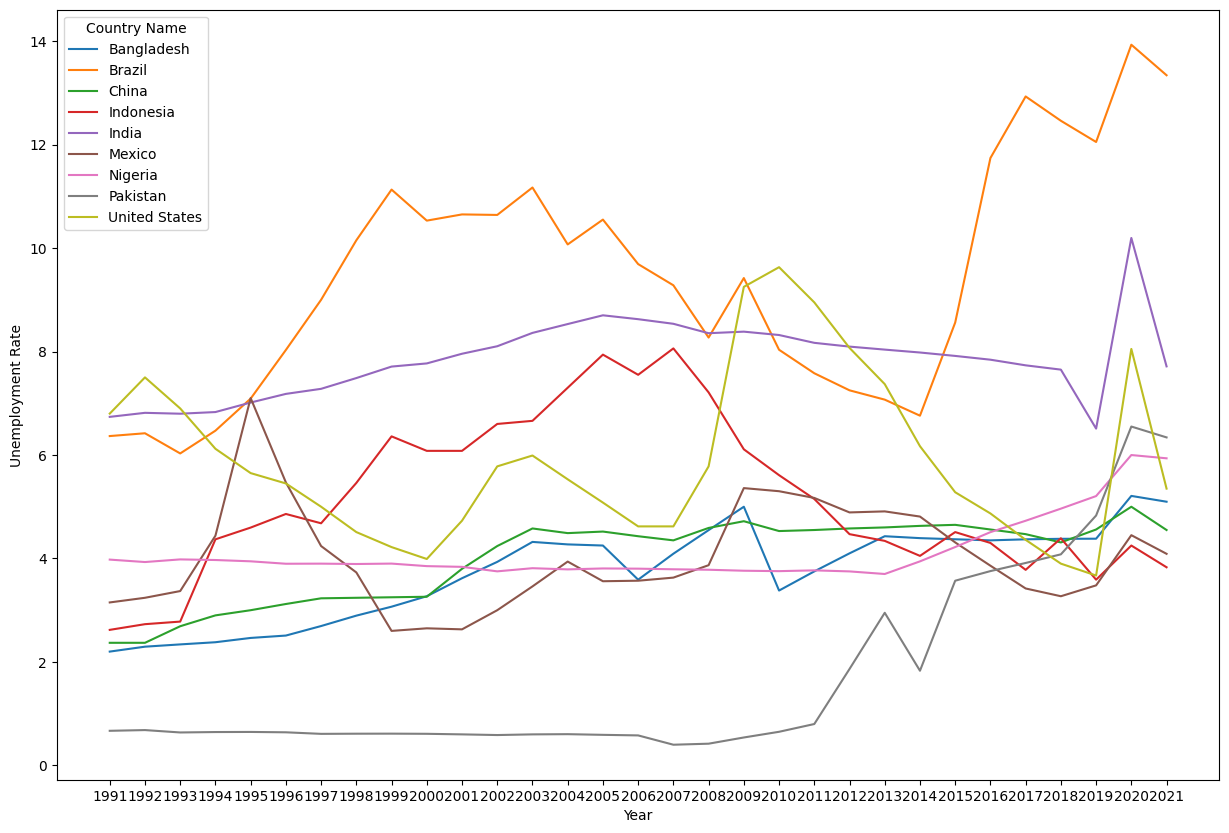

In [185]:
#population
# create the line plot using seaborn
plt.figure(figsize=(15, 10))
sns.lineplot(x='Year', y='Unemployment Rate', hue='Country Name', data=melted_df_top)

# display the plot
plt.show()

#Economic Model Explainations

##Walrasian Model, simplified to be univariable (real minimum wage)

[-0.16237268] 0.08641052509571756


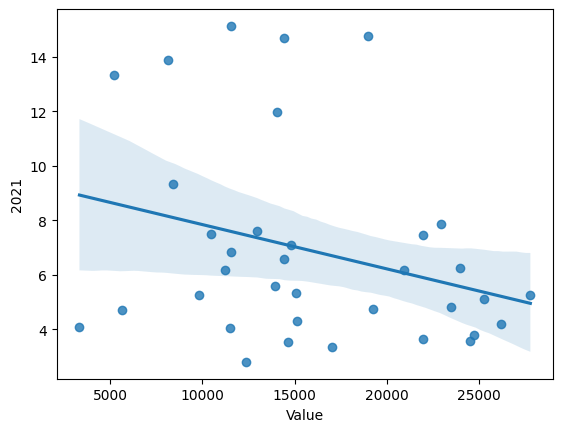

In [186]:

df_unemployeement=pd.read_csv('/data/UnemployeementRate.csv')

df_minWage = pd.read_csv('/data/realMinWage.csv')
df_minWage = df_minWage.query('Time == 2021 and SERIES.str.startswith("PPP") and PERIOD.str.startswith("A") ')

df_minWage_vs_Unempl=pd.merge(df_minWage,df_unemployeement,left_on='COUNTRY',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2021',data=df_minWage_vs_Unempl)

X = df_minWage_vs_Unempl[['Value']]
Y = df_minWage_vs_Unempl['2021']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_*1000,lm.score(X,Y))

In [187]:
df_minWage.head()

,COUNTRY,Country,SERIES,Series,PERIOD,Pay period,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
20,IRL,Ireland,PPP,In 2021 constant prices at 2021 USD PPPs,A,Annual,2021,2021,USD,US Dollar,0,Units,NaN,NaN,20957.12,NaN,NaN
125,LUX,Luxembourg,PPP,In 2021 constant prices at 2021 USD PPPs,A,Annual,2021,2021,USD,US Dollar,0,Units,NaN,NaN,27799.44,NaN,NaN
251,PRT,Portugal,PPP,In 2021 constant prices at 2021 USD PPPs,A,Annual,2021,2021,USD,US Dollar,0,Units,NaN,NaN,14411.59,NaN,NaN
293,USA,United States,PPP,In 2021 constant prices at 2021 USD PPPs,A,Annual,2021,2021,USD,US Dollar,0,Units,NaN,NaN,15080.00,NaN,NaN
376,EST,Estonia,PPP,In 2021 constant prices at 2021 USD PPPs,A,Annual,2021,2021,USD,US Dollar,0,Units,NaN,NaN,11200.22,NaN,NaN


#Let's try some other factors

In [188]:
df_all = pd.read_csv('/data/everything.csv')

<ipython-input-188-5fe99701b6db>:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('everything.csv')


##What percent of the employed population is employed in the service sector

[0.06280487] 0.017517896380651155


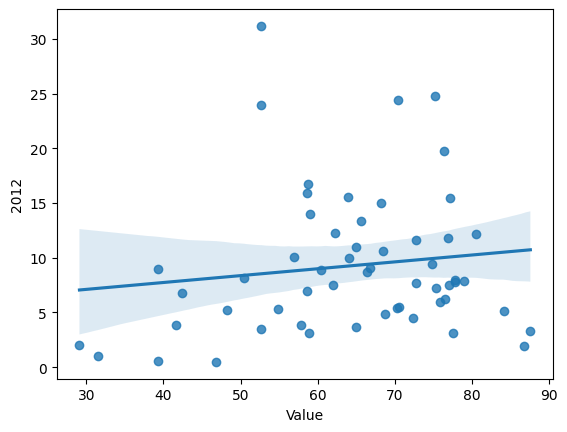

In [189]:
df_service = df_all.query('Variable.str.startswith("Total employment in service sector") and Sex.str.startswith("T") and TIME == 2012')
df_service_vs_Unempl=pd.merge(df_service,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_service_vs_Unempl)

X = df_service_vs_Unempl[['Value']]
Y = df_service_vs_Unempl['2012']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))


In [190]:
df_service.head()

,LOCATION,Country,VAR,Variable,SEX,Sex,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2417,AUT,Austria,EMPL_SERV,Total employment in service sector,T,Total,2012,2012,PC,Percentage,0,Units,NaN,NaN,68.80000,NaN,NaN
4647,BEL,Belgium,EMPL_SERV,Total employment in service sector,T,Total,2012,2012,PC,Percentage,0,Units,NaN,NaN,77.10001,NaN,NaN
7767,CZE,Czech Republic,EMPL_SERV,Total employment in service sector,T,Total,2012,2012,PC,Percentage,0,Units,NaN,NaN,58.60000,NaN,NaN
10019,DNK,Denmark,EMPL_SERV,Total employment in service sector,T,Total,2012,2012,PC,Percentage,0,Units,NaN,NaN,77.80000,NaN,NaN
12097,FIN,Finland,EMPL_SERV,Total employment in service sector,T,Total,2012,2012,PC,Percentage,0,Units,NaN,NaN,72.80000,NaN,NaN


[0.17287678] 0.11755597594837341


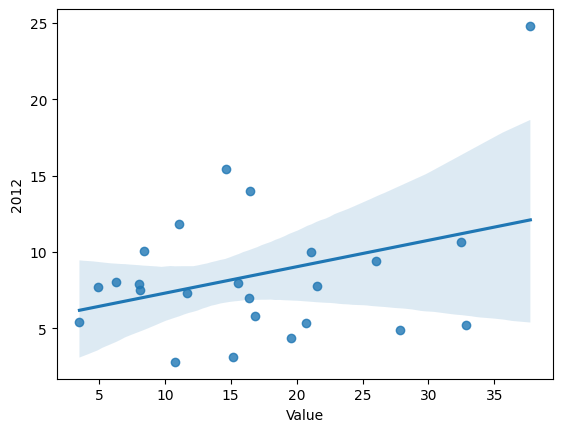

In [191]:
df_low = df_all.query('Variable.str.startswith("Job requirements; low qualification") and Sex.str.startswith("T")')
df_low_vs_Unempl=pd.merge(df_low,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_low_vs_Unempl)

X = df_low_vs_Unempl[['Value']]
Y = df_low_vs_Unempl['2012']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))

In [192]:
len(df_low)

24

[-0.11233564] 0.07191704341701288


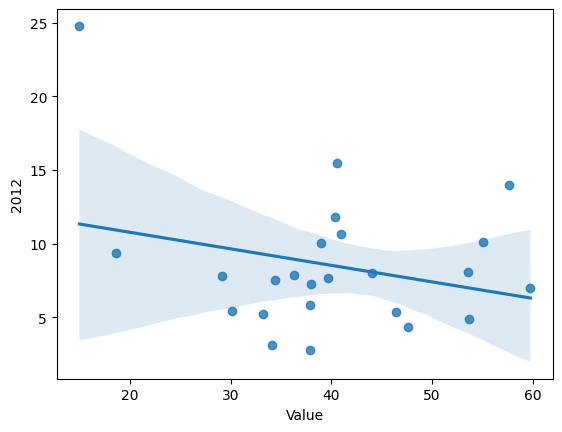

In [193]:
df_med = df_all.query('Variable.str.startswith("Job requirements; medium qualification") and Sex.str.startswith("T")')
df_med_vs_Unempl=pd.merge(df_med,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_med_vs_Unempl)

X = df_med_vs_Unempl[['Value']]
Y = df_med_vs_Unempl['2012']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))

[-0.03805309] 0.005336410782648349


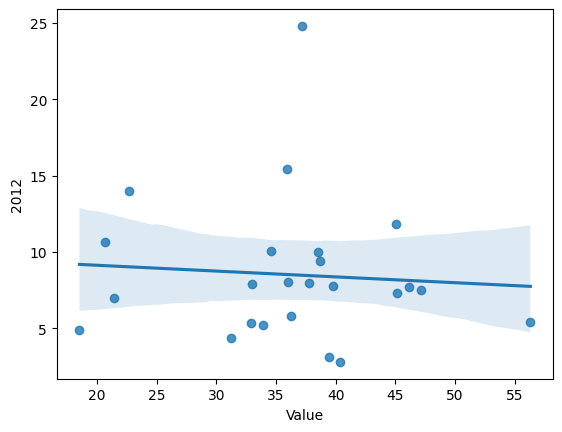

In [194]:
df_high = df_all.query('Variable.str.startswith("Job requirements; high qualification") and Sex.str.startswith("T")')
df_high_vs_Unempl=pd.merge(df_high,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_high_vs_Unempl)

X = df_high_vs_Unempl[['Value']]
Y = df_high_vs_Unempl['2012']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))

In [195]:
df_high = df_high.rename(columns={"Value": "highSkill"})
df_med = df_med.rename(columns={"Value": "medSkill"})
df_low = df_low.rename(columns={"Value": "lowSkill"})

df_skill = pd.merge(df_high,df_med,left_on='LOCATION',right_on='LOCATION',how='inner')
df_skill = pd.merge(df_skill,df_low,left_on='LOCATION',right_on='LOCATION',how='inner')
df_skill = pd.merge(df_skill,df_minWage,left_on='LOCATION',right_on='COUNTRY',how='inner')
df_skill = pd.merge(df_skill,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')

X = df_skill[['highSkill','medSkill','lowSkill','Value']]
Y = df_skill['2012']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X,Y))

0.40127618727927294


<ipython-input-195-cfc31a4c4c7a>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unit Code_x', 'Reference Period Code_x', 'Flags_x', 'PowerCode Code_x', 'TIME_x', 'Reference Period_x', 'Flag Codes_x', 'Unit_x', 'Country_x', 'PowerCode_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_skill = pd.merge(df_skill,df_minWage,left_on='LOCATION',right_on='COUNTRY',how='inner')


In [196]:
# Perform 5-fold cross-validation
scores = cross_val_score(lm, X, Y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())

R2 scores: [-57.82888733  -0.5322766   -0.75337599  -1.02190173 -55.77829043]
Mean R2 score: -23.18294641683509


##RandomForest Regressor

In [197]:
# Create and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

print(rf.score(X,Y))

0.8472825465652762


In [198]:

# Create a Random Forest Regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, Y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())

R2 scores: [-23.61231073  -0.43867737  -0.27100805  -0.75756724  -5.04753521]
Mean R2 score: -6.025419720970426


##ARIMA model to predict future unemployment Rate

In [199]:
# Set the index to be the year column
Unemployment_years.set_index('Country Name', inplace=True)


In [205]:
def ARIMA_model(country):
  country_data = Unemployment_years.loc[country]
  #Split the data into training and testing sets
  train_data = country_data.iloc[:int(len(country_data)*0.98)]
  test_data = country_data.iloc[int(len(country_data)*0.98):]
  # Fit the ARIMA model
  model = ARIMA(train_data, order=(2, 1, 2))
  model_fit = model.fit()
  # Make predictions on the testing set
  predictions = model_fit.forecast(steps=len(test_data))
  mse = mean_squared_error(test_data, predictions)
  return mse


In [207]:
Country_list=Unemployment_years.index.tolist()


In [208]:
ARIMA_model('India')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


7.000255824442088

In [174]:
# Country_list=[x for x in Country_list if str(x) != 'NaN']

In [209]:
mse_values=[]
for country in Country_list:
  mse_values.append(ARIMA_model(country))



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  

In [212]:
average_mse=sum(mse_values)/len(mse_values)